# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [57]:
# Code Here
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import *
from plotnine import *
from palmerpenguins import load_penguins
import matplotlib.pyplot as plt
import warnings 
from sklearn.preprocessing import label_binarize
from sklearn.exceptions import ConvergenceWarning
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

penguins = load_penguins()

penguins_practice = penguins.copy()
penguins_practice = penguins_practice.dropna()
penguins_practice.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [46]:
# Dependent variable is entire species columns

X = penguins_practice.drop(["species"], axis = 1)
y = penguins_practice["species"]


X_train, X_test, y_train, y_test = train_test_split(X, y)

# Dummify everything needed and scale numerical columns
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough" 
)


# KNN

In [47]:
# KNN Model 1 

knn_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("knn", KNeighborsClassifier(n_neighbors= 5))]
)

knn_fitted_1 = knn_pipeline_1.fit(X_train, y_train)
knn_y_preds_1 = knn_fitted_1.predict(X_test)

In [48]:
# KNN Model 2

knn_pipeline_2 = Pipeline(
  [("preprocessing", ct),
  ("knn", KNeighborsClassifier(n_neighbors = 20))]
)

knn_fitted_2 = knn_pipeline_2.fit(X_train, y_train)
knn_y_preds_2 = knn_fitted_2.predict(X_test)

In [49]:
#Confusion Matrixes  
print('KNN Model 1 Confusion Matrix \n', confusion_matrix(y_test, knn_y_preds_1))
print('\nKNN Model 2 Confusion Matrix \n', confusion_matrix(y_test, knn_y_preds_2))

#Accuracy Scores  
print('\nKNN Model 1 Accuracy Score \n', accuracy_score(y_test, knn_y_preds_1))
print('\nKNN Model 2 Accuracy Score \n', accuracy_score(y_test, knn_y_preds_2))

#Precision Scores
print('\nKNN Model 1 Precision Score \n',precision_score(y_test, knn_y_preds_1, average = None))
print('\nKNN Model 2 Precision Score \n', precision_score(y_test, knn_y_preds_2, average = None))

#Recall Scores
print('\nKNN Model 1 Recall Score \n',recall_score(y_test, knn_y_preds_1, average = None))
print('\nKNN Model 1 Recall Score \n',recall_score(y_test, knn_y_preds_2, average = None))

# General Report: F1-Scores
report_knn_1 = classification_report(y_test, knn_y_preds_1)
print('\nScores Model 1', report_knn_1)

report_knn_2 = classification_report(y_test, knn_y_preds_2)
print('\nScores Model 2',report_knn_2)

# ROC / AUC
prob_knn_1 = knn_pipeline_1.predict_proba(X_test)
roc_auc_knn_1 = roc_auc_score(y_test, prob_knn_1, multi_class='ovr')
print('AUC Model 1', roc_auc_knn_1)

prob_knn_2 = knn_pipeline_2.predict_proba(X_test)
roc_auc_knn_2 = roc_auc_score(y_test, prob_knn_2, multi_class='ovr')
print('AUC Model 2', roc_auc_knn_2)


KNN Model 1 Confusion Matrix 
 [[41  1  0]
 [ 1 14  0]
 [ 0  0 27]]

KNN Model 2 Confusion Matrix 
 [[42  0  0]
 [ 2 13  0]
 [ 0  0 27]]

KNN Model 1 Accuracy Score 
 0.9761904761904762

KNN Model 2 Accuracy Score 
 0.9761904761904762

KNN Model 1 Precision Score 
 [0.97619048 0.93333333 1.        ]

KNN Model 2 Precision Score 
 [0.95454545 1.         1.        ]

KNN Model 1 Recall Score 
 [0.97619048 0.93333333 1.        ]

KNN Model 1 Recall Score 
 [1.         0.86666667 1.        ]

Scores Model 1               precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        42
   Chinstrap       0.93      0.93      0.93        15
      Gentoo       1.00      1.00      1.00        27

    accuracy                           0.98        84
   macro avg       0.97      0.97      0.97        84
weighted avg       0.98      0.98      0.98        84


Scores Model 2               precision    recall  f1-score   support

      Adelie       0.95      1.00      

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

# Decision Tree's

In [52]:
# Decision Tree Model 1

dt_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("decision_tree",  DecisionTreeClassifier(min_samples_leaf = 5))]
)

dt_fitted_1 = dt_pipeline_1.fit(X_train, y_train)
dt_y_preds_1 = dt_fitted_1.predict(X_test)

In [53]:
# Decision Tree Model 2

dt_pipeline_2 = Pipeline(
  [("preprocessing", ct),
  ("decision_tree",  DecisionTreeClassifier(min_samples_leaf = 10))]
)

dt_fitted_2 = dt_pipeline_2.fit(X_train, y_train)
dt_y_preds_2 = dt_fitted_2.predict(X_test)

In [54]:
#Confusion Matrixes  
print('DT Model 1 Confusion Matrix \n', confusion_matrix(y_test, dt_y_preds_1))
print('\nDT Model 2 Confusion Matrix \n', confusion_matrix(y_test, dt_y_preds_2))

#Accuracy Scores  
print('\nDT Model 1 Accuracy Score \n', accuracy_score(y_test, dt_y_preds_1))
print('\nDT Model 2 Accuracy Score \n', accuracy_score(y_test, dt_y_preds_2))

#Precision Scores
print('\nDT Model 1 Precision Score \n',precision_score(y_test, dt_y_preds_1, average = None))
print('\nDT Model 2 Precision Score \n', precision_score(y_test, dt_y_preds_2, average = None))

#Recall Scores
print('\nDT Model 1 Recall Score \n',recall_score(y_test, dt_y_preds_1, average = None))
print('\nDT Model 1 Recall Score \n',recall_score(y_test, dt_y_preds_2, average = None))

# General Report: F1-Scores
report_dt_1 = classification_report(y_test, dt_y_preds_1)
print('\n DT Scores Model 1', report_dt_1)

report_dt_2 = classification_report(y_test, dt_y_preds_2)
print('\n DT Scores Model 2',report_dt_2)

# ROC / AUC
prob_dt_1 = dt_pipeline_1.predict_proba(X_test)
roc_auc_dt_1 = roc_auc_score(y_test, prob_dt_1, multi_class='ovr')
print(' DT AUC Model 1', roc_auc_dt_1)

prob_dt_2 = dt_pipeline_2.predict_proba(X_test)
roc_auc_dt_2 = roc_auc_score(y_test, prob_dt_2, multi_class='ovr')
print(' DT AUC Model 2', roc_auc_dt_2)


DT Model 1 Confusion Matrix 
 [[41  1  0]
 [ 3 12  0]
 [ 0  2 25]]

DT Model 2 Confusion Matrix 
 [[41  1  0]
 [ 3 12  0]
 [ 0  2 25]]

DT Model 1 Accuracy Score 
 0.9285714285714286

DT Model 2 Accuracy Score 
 0.9285714285714286

DT Model 1 Precision Score 
 [0.93181818 0.8        1.        ]

DT Model 2 Precision Score 
 [0.93181818 0.8        1.        ]

DT Model 1 Recall Score 
 [0.97619048 0.8        0.92592593]

DT Model 1 Recall Score 
 [0.97619048 0.8        0.92592593]

 DT Scores Model 1               precision    recall  f1-score   support

      Adelie       0.93      0.98      0.95        42
   Chinstrap       0.80      0.80      0.80        15
      Gentoo       1.00      0.93      0.96        27

    accuracy                           0.93        84
   macro avg       0.91      0.90      0.91        84
weighted avg       0.93      0.93      0.93        84


 DT Scores Model 2               precision    recall  f1-score   support

      Adelie       0.93      0.98      

# Best Model's ROC Curve

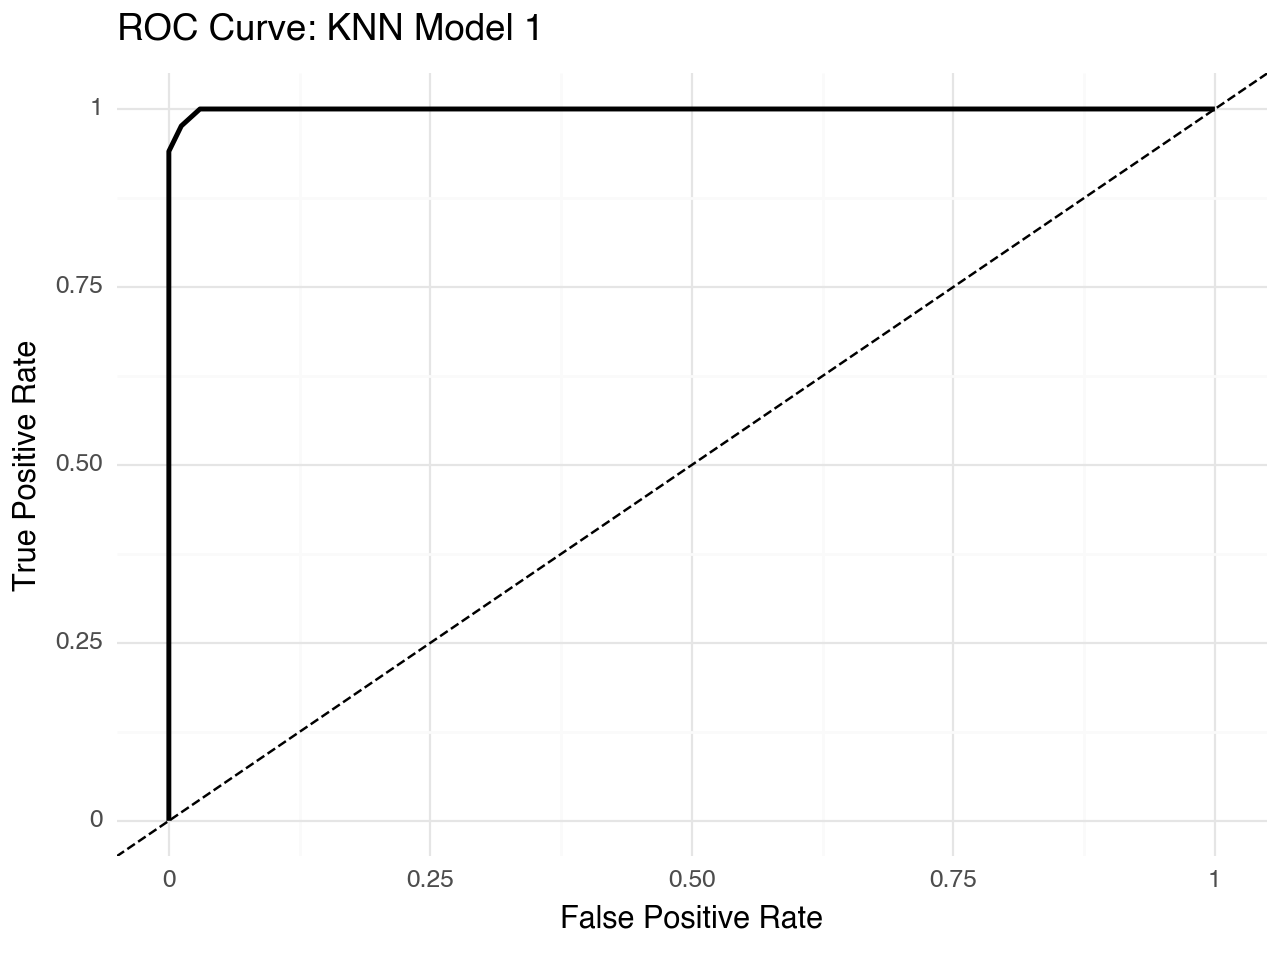

<Figure Size: (640 x 480)>

In [64]:
# Convert species labels to numerical values for ROC curve
y_bin = label_binarize(y_test, classes=knn_fitted_1.classes_)

y_probs_1 = knn_fitted_1.predict_proba(X_test)

# Calculate the ROC curve for each class
fpr, tpr, _= roc_curve(y_bin.ravel(), y_probs_1.ravel())

# Create a DataFrame for the ROC curve
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

# Plot the ROC curve using plotnine
(
    ggplot(roc_df, aes(x='FPR', y='TPR')) +
    geom_line(size=1) +
    geom_abline(slope=1, intercept=0, linetype='dashed', color='black') +
    labs(title='ROC Curve: KNN Model 1', x='False Positive Rate', y='True Positive Rate') +
    theme_minimal()
)
